In [1]:
import pandas as pd

# Load the user data from CSV
users_df = pd.read_csv('users.csv')

# Filter for users in Shanghai
shanghai_users = users_df[users_df['location'].str.contains('Shanghai', case=False, na=False)]

# Sort the users by followers in descending order
sorted_shanghai_users = shanghai_users.sort_values(by='followers', ascending=False)

# Get the top 5 users based on followers
top_5_users = sorted_shanghai_users.head(5)['login']

# Convert the list of logins to a comma-separated string
top_5_users_logins = ', '.join(top_5_users)

print("Top 5 users by followers:", top_5_users_logins)


Top 5 users by followers: peng-zhihui, ruanyf, phodal, liyupi, stormzhang


In [2]:
import pandas as pd

# Load the user data from CSV
users_df = pd.read_csv('users.csv')

# Convert the 'created_at' column to datetime format for sorting
users_df['created_at'] = pd.to_datetime(users_df['created_at'])

# Filter for users in Shanghai
shanghai_users = users_df[users_df['location'].str.contains('Shanghai', case=False, na=False)]

# Sort the users by 'created_at' in ascending order
sorted_shanghai_users = shanghai_users.sort_values(by='created_at', ascending=True)

# Get the top 5 earliest registered users based on 'created_at'
earliest_5_users = sorted_shanghai_users.head(5)['login']

# Convert the list of logins to a comma-separated string
earliest_5_users_logins = ', '.join(earliest_5_users)

print("Earliest 5 registered users by created_at:", earliest_5_users_logins)


Earliest 5 registered users by created_at: osteele, mrluanma, ShiningRay, rainux, why404


In [3]:
import pandas as pd

# Load the repository data from CSV
repos_df = pd.read_csv('repositories.csv')

# Filter out repositories with missing or null licenses
repos_with_license = repos_df[repos_df['license_name'].notna()]

# Count the occurrences of each license
license_counts = repos_with_license['license_name'].value_counts()

# Get the top 3 most popular licenses
top_3_licenses = license_counts.head(3).index

# Convert the list of license names to a comma-separated string
top_3_licenses_str = ', '.join(top_3_licenses)

print("Top 3 most popular licenses:", top_3_licenses_str)


Top 3 most popular licenses: MIT License, Apache License 2.0, Other


In [4]:
import pandas as pd

# Load the user data from CSV
users_df = pd.read_csv('users.csv')

# Filter out rows with missing or null company data
users_with_company = users_df[users_df['company'].notna()]

# Count the occurrences of each company
company_counts = users_with_company['company'].value_counts()

# Get the company with the highest count
most_common_company = company_counts.idxmax()

print("Company with the most developers:", most_common_company)


Company with the most developers: BYTEDANCE


In [5]:
import pandas as pd

# Load the repositories data from CSV
repos_df = pd.read_csv('repositories.csv')

# Filter out rows with missing or null language data
repos_with_language = repos_df[repos_df['language'].notna()]

# Count the occurrences of each programming language
language_counts = repos_with_language['language'].value_counts()

# Get the most popular language
most_popular_language = language_counts.idxmax()

print("Most popular programming language:", most_popular_language)


Most popular programming language: JavaScript


In [19]:
import pandas as pd

# Load the user and repository data from CSV
users_df = pd.read_csv('users.csv')
repos_df = pd.read_csv('repositories.csv')

# Convert the 'created_at' column in users to datetime format
users_df['created_at'] = pd.to_datetime(users_df['created_at'])

# Filter users who joined after 2020
users_after_2020 = users_df[users_df['created_at'] > '2020-12-31']

# Merge the filtered users with their repositories based on the 'login' field
merged_data = pd.merge(users_after_2020[['login']], repos_df, on='login', how='inner')

# Filter out repositories with missing or null language data
repos_with_language = merged_data[merged_data['language'].notna()]

# Count the occurrences of each programming language
language_counts = repos_with_language['language'].value_counts()

# Get the second most popular language
second_most_popular_language = language_counts.index[0]

print("Second most popular programming language (after 2020):", second_most_popular_language)


Second most popular programming language (after 2020): Go


In [7]:
import pandas as pd

# Load the repositories data from CSV
repos_df = pd.read_csv('repositories.csv')

# Filter out rows with missing or null language data
repos_with_language = repos_df[repos_df['language'].notna()]

# Group by language and calculate the average number of stars (stargazers_count)
avg_stars_per_language = repos_with_language.groupby('language')['stargazers_count'].mean()

# Find the language with the highest average number of stars
language_with_highest_avg_stars = avg_stars_per_language.idxmax()

print("Language with the highest average number of stars per repository:", language_with_highest_avg_stars)


Language with the highest average number of stars per repository: Rich Text Format


In [8]:
import pandas as pd

# Load the user data from CSV
users_df = pd.read_csv('users.csv')

# Calculate leader_strength as followers / (1 + following)
users_df['leader_strength'] = users_df['followers'] / (1 + users_df['following'])

# Sort the users by leader_strength in descending order
sorted_users = users_df.sort_values(by='leader_strength', ascending=False)

# Get the top 5 users based on leader_strength
top_5_leader_strength = sorted_users.head(5)['login']

# Convert the list of logins to a comma-separated string
top_5_leader_strength_logins = ', '.join(top_5_leader_strength)

print("Top 5 users by leader_strength:", top_5_leader_strength_logins)


Top 5 users by leader_strength: ruanyf, peng-zhihui, espressif, vnpy, bilibili


In [9]:
import pandas as pd

# Load the user data from CSV
users_df = pd.read_csv('users.csv')

# Filter for users in Shanghai
shanghai_users = users_df[users_df['location'].str.contains('Shanghai', case=False, na=False)]

# Calculate the correlation between followers and public_repos
correlation = shanghai_users['followers'].corr(shanghai_users['public_repos'])

print("Correlation between followers and public repositories in Shanghai:", correlation)


Correlation between followers and public repositories in Shanghai: -0.005036478132579658



Results:
Slope coefficient: -0.054

Detailed interpretation:

        For each additional public repository, a user gains an average of -0.054 followers.
        The R-squared value of 0.000 indicates that 0.0% of the 
        variation in followers can be explained by the number of public repositories.
        


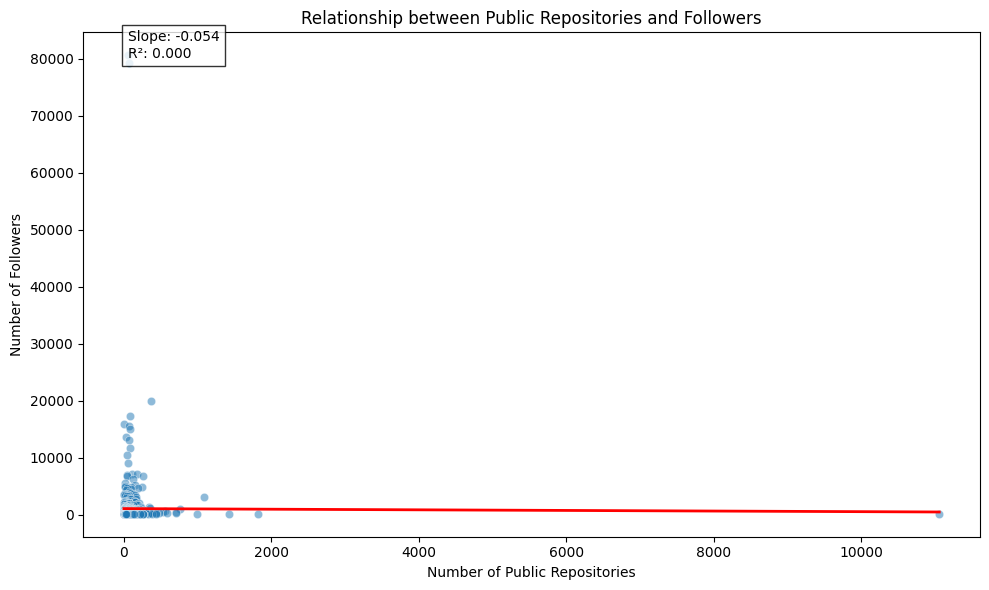

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_github_followers(users_file='users.csv'):
    # Read the users data
    users_df = pd.read_csv(users_file)

    # Create the regression model
    X = users_df[['public_repos']].values
    y = users_df['followers'].values

    # Fit the regression model
    model = LinearRegression()
    model.fit(X, y)

    # Get the slope coefficient rounded to 3 decimal places
    slope = round(model.coef_[0], 3)

    # Calculate R-squared
    r_squared = model.score(X, y)

    # Create visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=users_df, x='public_repos', y='followers', alpha=0.5)

    # Add regression line
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    plt.plot(x_range, y_pred, color='red', linewidth=2)

    plt.title('Relationship between Public Repositories and Followers')
    plt.xlabel('Number of Public Repositories')
    plt.ylabel('Number of Followers')

    # Add text with regression results
    text = f'Slope: {slope}\nR²: {r_squared:.3f}'
    plt.text(0.05, 0.95, text, transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()

    return {
        'slope': slope,
        'r_squared': r_squared,
        'interpretation': f"""
        For each additional public repository, a user gains an average of {slope} followers.
        The R-squared value of {r_squared:.3f} indicates that {(r_squared * 100):.1f}% of the
        variation in followers can be explained by the number of public repositories.
        """
    }


if __name__ == "__main__":
    results = analyze_github_followers()
    print("\nResults:")
    print(f"Slope coefficient: {results['slope']}")
    print(f"\nDetailed interpretation:")
    print(results['interpretation'])



Correlation between projects and wiki enabled: 0.278

Distribution of features:
Total repositories analyzed: 73267
Repositories with both features: 63984 (87.3%)
Repositories with only projects: 8330 (11.4%)
Repositories with only wiki: 68 (0.1%)
Repositories with neither: 885 (1.2%)


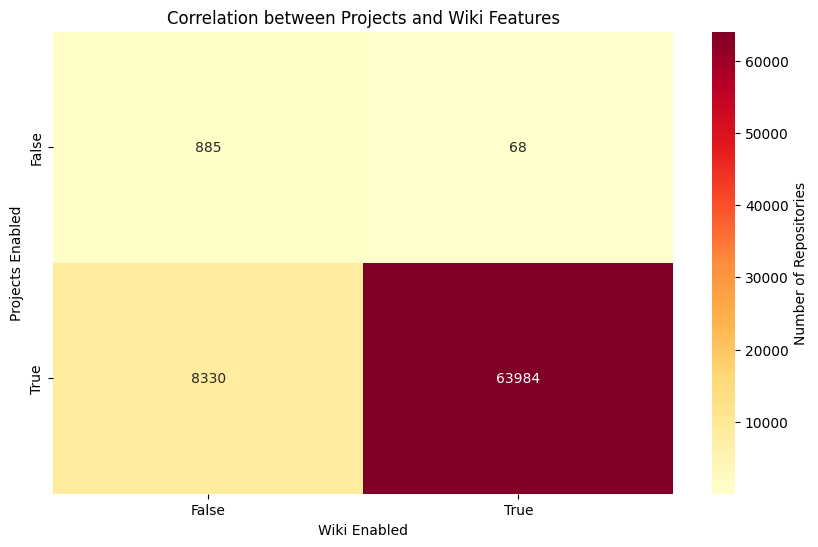

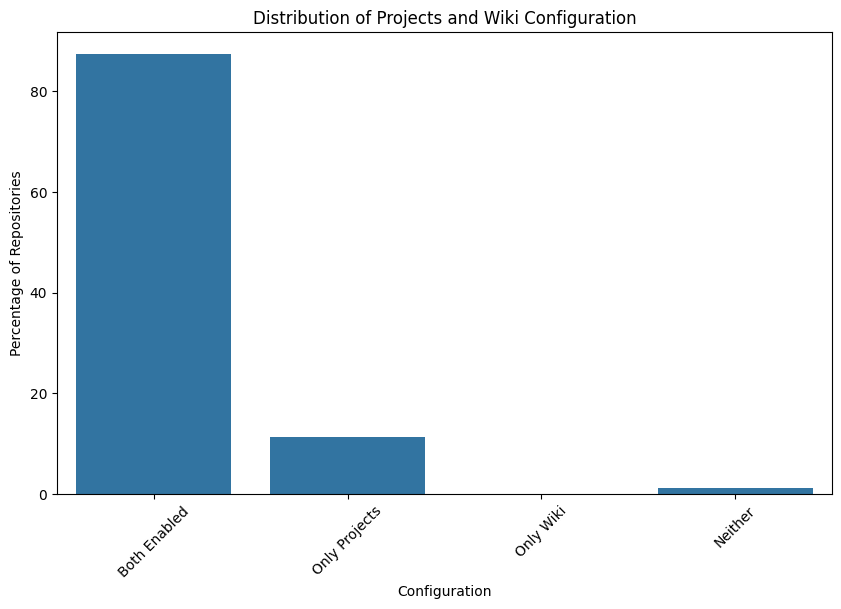

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def analyze_feature_correlation(repos_file='repositories.csv'):
    # Read the repositories data
    repos_df = pd.read_csv(repos_file)

    # Calculate correlation between has_projects and has_wiki
    correlation = round(repos_df['has_projects'].corr(repos_df['has_wiki']), 3)

    # Create a contingency table
    contingency = pd.crosstab(repos_df['has_projects'], repos_df['has_wiki'])

    # Calculate percentages
    total_repos = len(repos_df)
    both_enabled = len(repos_df[(repos_df['has_projects'] == True) & (repos_df['has_wiki'] == True)])
    only_projects = len(repos_df[(repos_df['has_projects'] == True) & (repos_df['has_wiki'] == False)])
    only_wiki = len(repos_df[(repos_df['has_projects'] == False) & (repos_df['has_wiki'] == True)])
    neither = len(repos_df[(repos_df['has_projects'] == False) & (repos_df['has_wiki'] == False)])

    # Create visualization
    plt.figure(figsize=(10, 6))

    # Create heatmap
    sns.heatmap(contingency,
                annot=True,
                fmt='d',
                cmap='YlOrRd',
                cbar_kws={'label': 'Number of Repositories'})

    plt.title('Correlation between Projects and Wiki Features')
    plt.xlabel('Wiki Enabled')
    plt.ylabel('Projects Enabled')

    # Add text with correlation and percentages
    text = f"""
    Correlation: {correlation}
    Both enabled: {both_enabled/total_repos:.1%}
    Only projects: {only_projects/total_repos:.1%}
    Only wiki: {only_wiki/total_repos:.1%}
    Neither: {neither/total_repos:.1%}
    """

    plt.figure(figsize=(10, 6))
    data = {
        'Configuration': ['Both Enabled', 'Only Projects', 'Only Wiki', 'Neither'],
        'Percentage': [both_enabled/total_repos*100,
                      only_projects/total_repos*100,
                      only_wiki/total_repos*100,
                      neither/total_repos*100]
    }
    bar_df = pd.DataFrame(data)
    sns.barplot(x='Configuration', y='Percentage', data=bar_df)
    plt.title('Distribution of Projects and Wiki Configuration')
    plt.ylabel('Percentage of Repositories')
    plt.xticks(rotation=45)

    return {
        'correlation': correlation,
        'counts': {
            'total_repos': total_repos,
            'both_enabled': both_enabled,
            'only_projects': only_projects,
            'only_wiki': only_wiki,
            'neither': neither
        },
        'contingency_table': contingency
    }

# Run the analysis
if __name__ == "__main__":
    results = analyze_feature_correlation()
    print(f"\nCorrelation between projects and wiki enabled: {results['correlation']}")
    print("\nDistribution of features:")
    counts = results['counts']
    print(f"Total repositories analyzed: {counts['total_repos']}")
    print(f"Repositories with both features: {counts['both_enabled']} ({counts['both_enabled']/counts['total_repos']:.1%})")
    print(f"Repositories with only projects: {counts['only_projects']} ({counts['only_projects']/counts['total_repos']:.1%})")
    print(f"Repositories with only wiki: {counts['only_wiki']} ({counts['only_wiki']/counts['total_repos']:.1%})")
    print(f"Repositories with neither: {counts['neither']} ({counts['neither']/counts['total_repos']:.1%})")



Difference in average following (hireable - non_hireable): 143.519

Detailed results:
Hireable users average following: 305.4
Non-hireable users average following: 161.9
Number of hireable users: 214
Number of non-hireable users: 525
P-value: 0.085


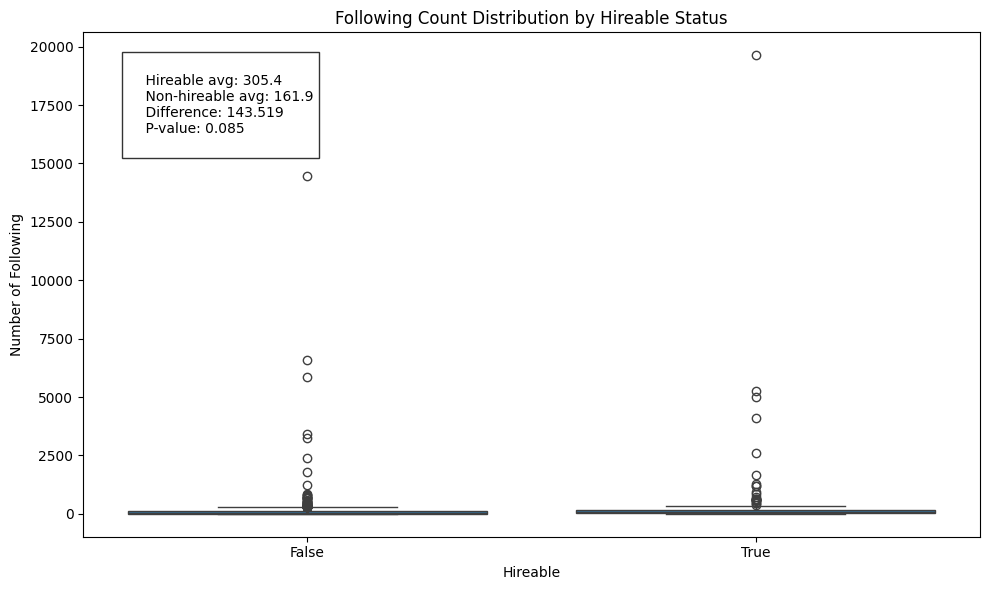

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_following_by_hireable(users_file='users.csv'):
    # Read the users data
    users_df = pd.read_csv(users_file)

    # Convert hireable to boolean if it's not already
    if users_df['hireable'].dtype != bool:
        users_df['hireable'] = users_df['hireable'].fillna(False).astype(bool)

    # Calculate average following for each group
    hireable_avg = users_df[users_df['hireable']]['following'].mean()
    non_hireable_avg = users_df[~users_df['hireable']]['following'].mean()

    # Calculate the difference (hireable - non_hireable)
    difference = round(hireable_avg - non_hireable_avg, 3)

    # Perform t-test for statistical significance
    hireable_following = users_df[users_df['hireable']]['following']
    non_hireable_following = users_df[~users_df['hireable']]['following']
    t_stat, p_value = stats.ttest_ind(hireable_following, non_hireable_following)

    # Create visualization
    plt.figure(figsize=(10, 6))

    # Create box plot
    sns.boxplot(x='hireable', y='following', data=users_df)

    plt.title('Following Count Distribution by Hireable Status')
    plt.xlabel('Hireable')
    plt.ylabel('Number of Following')

    # Add text with statistics
    stats_text = f"""
    Hireable avg: {hireable_avg:.1f}
    Non-hireable avg: {non_hireable_avg:.1f}
    Difference: {difference}
    P-value: {p_value:.3f}
    """
    plt.text(0.05, 0.95, stats_text,
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top')

    plt.tight_layout()

    return {
        'difference': difference,
        'hireable_avg': hireable_avg,
        'non_hireable_avg': non_hireable_avg,
        'p_value': p_value,
        'counts': {
            'hireable': len(hireable_following),
            'non_hireable': len(non_hireable_following)
        }
    }

# Run the analysis
if __name__ == "__main__":
    results = analyze_following_by_hireable()
    print(f"\nDifference in average following (hireable - non_hireable): {results['difference']}")
    print(f"\nDetailed results:")
    print(f"Hireable users average following: {results['hireable_avg']:.1f}")
    print(f"Non-hireable users average following: {results['non_hireable_avg']:.1f}")
    print(f"Number of hireable users: {results['counts']['hireable']}")
    print(f"Number of non-hireable users: {results['counts']['non_hireable']}")
    print(f"P-value: {results['p_value']:.3f}")



Slope coefficient: -42.241

Detailed statistics:
Sample size: 534 users with bios
Average bio length: 6.0 words
Median bio length: 5.0 words

Interpretation:

        For each additional word in a user's bio, they have on average -42.241 more followers.
        The R-squared value of 0.003 indicates that 0.3% of the 
        variation in followers can be explained by bio length.
        Analysis based on 534 users with bios (out of 739 total users).
        


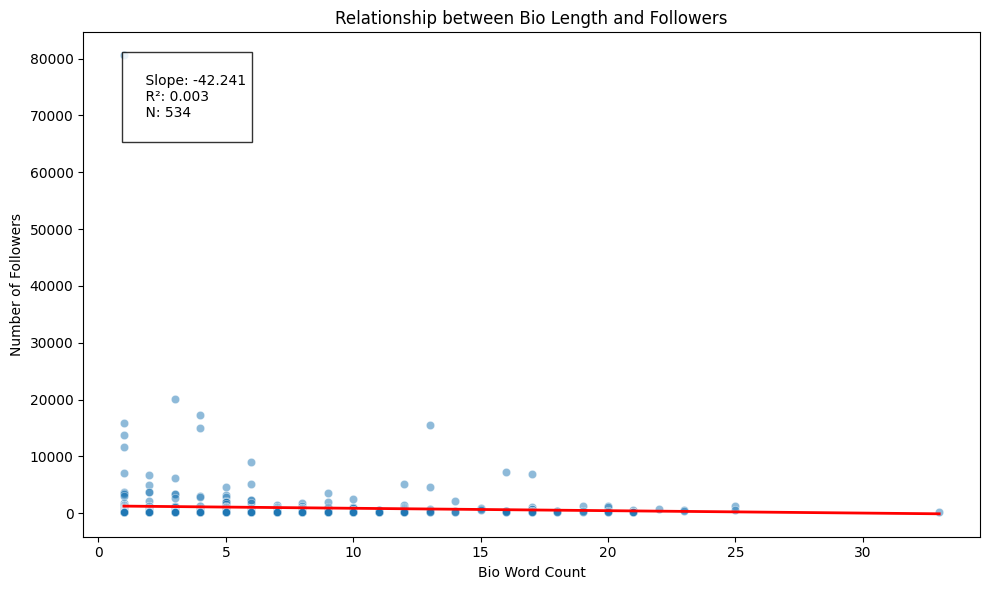

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_bio_impact(users_file='users.csv'):
    # Read the users data
    users_df = pd.read_csv(users_file)

    # Function to count words in bio
    def count_words(bio):
        if pd.isna(bio):
            return 0
        return len(str(bio).split())

    # Add word count column
    users_df['bio_word_count'] = users_df['bio'].apply(count_words)

    # Filter out users without bios
    users_with_bios = users_df[users_df['bio_word_count'] > 0].copy()

    # Prepare data for regression
    X = users_with_bios[['bio_word_count']].values
    y = users_with_bios['followers'].values

    # Fit regression model
    model = LinearRegression()
    model.fit(X, y)

    # Get slope coefficient (rounded to 3 decimal places)
    slope = round(model.coef_[0], 3)

    # Calculate R-squared
    r_squared = model.score(X, y)

    # Create visualization
    plt.figure(figsize=(10, 6))

    # Create scatter plot
    sns.scatterplot(data=users_with_bios,
                   x='bio_word_count',
                   y='followers',
                   alpha=0.5)

    # Add regression line
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    plt.plot(x_range, y_pred, color='red', linewidth=2)

    plt.title('Relationship between Bio Length and Followers')
    plt.xlabel('Bio Word Count')
    plt.ylabel('Number of Followers')

    # Add text with regression results
    stats_text = f"""
    Slope: {slope}
    R²: {r_squared:.3f}
    N: {len(users_with_bios)}
    """
    plt.text(0.05, 0.95, stats_text,
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top')

    plt.tight_layout()

    # Calculate additional statistics
    average_bio_length = users_with_bios['bio_word_count'].mean()
    median_bio_length = users_with_bios['bio_word_count'].median()

    return {
        'slope': slope,
        'r_squared': r_squared,
        'sample_size': len(users_with_bios),
        'avg_bio_length': average_bio_length,
        'median_bio_length': median_bio_length,
        'total_users': len(users_df),
        'users_with_bios': len(users_with_bios),
        'interpretation': f"""
        For each additional word in a user's bio, they have on average {slope} more followers.
        The R-squared value of {r_squared:.3f} indicates that {(r_squared * 100):.1f}% of the
        variation in followers can be explained by bio length.
        Analysis based on {len(users_with_bios)} users with bios (out of {len(users_df)} total users).
        """
    }

# Run the analysis
if __name__ == "__main__":
    results = analyze_bio_impact()
    print(f"\nSlope coefficient: {results['slope']}")
    print(f"\nDetailed statistics:")
    print(f"Sample size: {results['sample_size']} users with bios")
    print(f"Average bio length: {results['avg_bio_length']:.1f} words")
    print(f"Median bio length: {results['median_bio_length']:.1f} words")
    print(f"\nInterpretation:")
    print(results['interpretation'])


In [16]:
import pandas as pd

# Load the repository data from CSV
repos_df = pd.read_csv('repositories.csv')

# Convert the 'created_at' column to datetime format
repos_df['created_at'] = pd.to_datetime(repos_df['created_at'])

# Filter for repositories created on weekends (Saturday=5, Sunday=6)
weekend_repos = repos_df[repos_df['created_at'].dt.dayofweek.isin([5, 6])]

# Count the number of repositories created by each user
repos_count_by_user = weekend_repos['login'].value_counts()

# Get the top 5 users based on the number of repositories created on weekends
top_5_users = repos_count_by_user.head(5).index

# Convert the list of logins to a comma-separated string
top_5_users_logins = ', '.join(top_5_users)

print("Top 5 users who created the most repositories on weekends:", top_5_users_logins)


Top 5 users who created the most repositories on weekends: Hengle, j5s, Ewenwan, HiWong, gonnavis



Difference in email sharing (hireable - non_hireable): 0.073

Detailed results:
Hireable users sharing email: 74.3%
Non-hireable users sharing email: 67.0%

Sample sizes:
Hireable users: 159 out of 214
Non-hireable users: 352 out of 525

Statistical significance:
P-value: 0.065


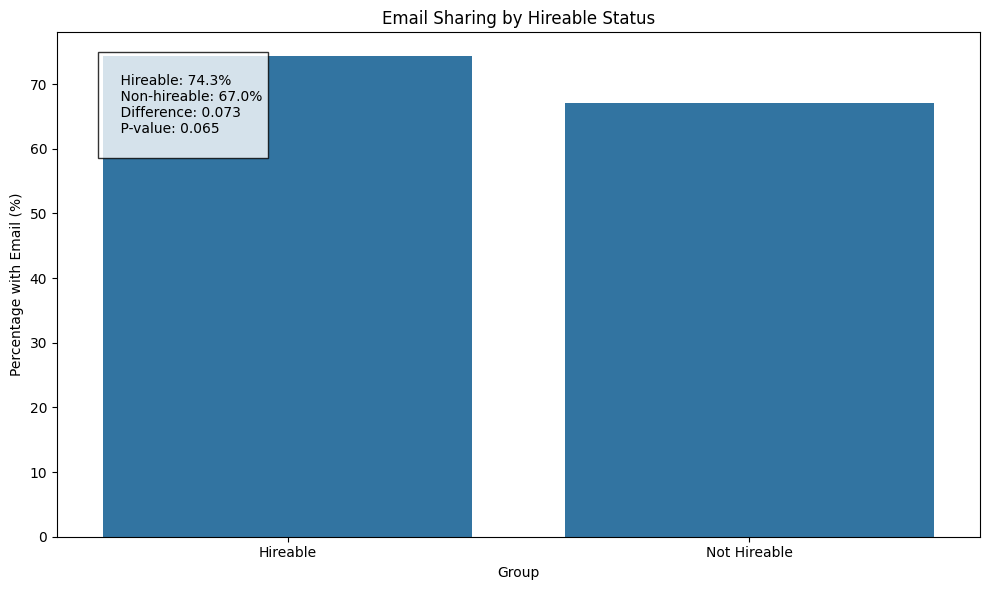

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_email_sharing(users_file='users.csv'):
    # Read the users data
    users_df = pd.read_csv(users_file)

    # Convert hireable to boolean if it's not already
    if users_df['hireable'].dtype != bool:
        users_df['hireable'] = users_df['hireable'].fillna(False).astype(bool)

    # Function to check if email is present
    def has_email(email):
        return not pd.isna(email) and str(email).strip() != ''

    # Add has_email column
    users_df['has_email'] = users_df['email'].apply(has_email)

    # Calculate fractions for each group
    hireable_users = users_df[users_df['hireable']]
    non_hireable_users = users_df[~users_df['hireable']]

    hireable_email_fraction = hireable_users['has_email'].mean()
    non_hireable_email_fraction = non_hireable_users['has_email'].mean()

    # Calculate the difference (hireable - non_hireable)
    difference = round(hireable_email_fraction - non_hireable_email_fraction, 3)

    # Perform chi-square test for significance
    contingency = pd.crosstab(users_df['hireable'], users_df['has_email'])
    chi2, p_value = stats.chi2_contingency(contingency)[:2]

    # Create visualization
    plt.figure(figsize=(10, 6))

    # Create grouped bar plot
    data = {
        'Group': ['Hireable', 'Not Hireable'],
        'Email Share': [hireable_email_fraction * 100, non_hireable_email_fraction * 100]
    }
    bar_df = pd.DataFrame(data)
    sns.barplot(x='Group', y='Email Share', data=bar_df)

    plt.title('Email Sharing by Hireable Status')
    plt.ylabel('Percentage with Email (%)')

    # Add text with statistics
    stats_text = f"""
    Hireable: {hireable_email_fraction:.1%}
    Non-hireable: {non_hireable_email_fraction:.1%}
    Difference: {difference:.3f}
    P-value: {p_value:.3f}
    """
    plt.text(0.05, 0.95, stats_text,
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top')

    plt.tight_layout()

    return {
        'difference': difference,
        'hireable_fraction': hireable_email_fraction,
        'non_hireable_fraction': non_hireable_email_fraction,
        'p_value': p_value,
        'counts': {
            'hireable_total': len(hireable_users),
            'non_hireable_total': len(non_hireable_users),
            'hireable_with_email': hireable_users['has_email'].sum(),
            'non_hireable_with_email': non_hireable_users['has_email'].sum()
        }
    }

# Run the analysis
if __name__ == "__main__":
    results = analyze_email_sharing()
    print(f"\nDifference in email sharing (hireable - non_hireable): {results['difference']}")
    print(f"\nDetailed results:")
    print(f"Hireable users sharing email: {results['hireable_fraction']:.1%}")
    print(f"Non-hireable users sharing email: {results['non_hireable_fraction']:.1%}")
    print(f"\nSample sizes:")
    counts = results['counts']
    print(f"Hireable users: {counts['hireable_with_email']} out of {counts['hireable_total']}")
    print(f"Non-hireable users: {counts['non_hireable_with_email']} out of {counts['non_hireable_total']}")
    print(f"\nStatistical significance:")
    print(f"P-value: {results['p_value']:.3f}")


In [18]:
import pandas as pd
from collections import Counter

# Load the user data from CSV
users_df = pd.read_csv('users.csv')

# Filter out users without names
users_with_names = users_df[users_df['name'].notna()]

# Extract surnames by trimming and splitting names
users_with_names['surname'] = users_with_names['name'].apply(lambda x: x.strip().split()[-1])

# Count occurrences of each surname
surname_counts = Counter(users_with_names['surname'])

# Find the maximum count of any surname(s)
max_count = max(surname_counts.values())

# Get all surnames with the maximum count
most_common_surnames = [surname for surname, count in surname_counts.items() if count == max_count]

# Sort surnames alphabetically
most_common_surnames.sort()

# Convert the list of surnames to a comma-separated string
most_common_surnames_str = ', '.join(most_common_surnames)

print("Most common surname(s):", most_common_surnames_str)


Most common surname(s): Zhang


<ipython-input-18-290234a49060>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_with_names['surname'] = users_with_names['name'].apply(lambda x: x.strip().split()[-1])
